In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [107]:
cnn = tf.keras.models.Sequential()

In [108]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [109]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [110]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))   

In [111]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [112]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [113]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [114]:
cnn.compile(optimizer=Adam(learning_rate=0.0001), 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

In [115]:
cnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 14, 14, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_43 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_89 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,547,722 (28.79 MB)

 Trainable params: 7,547,722 (28.79 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1170s 531ms/step - accuracy: 0.4082 - loss: 2.0947 - val_accuracy: 0.7705 - val_loss: 0.7408
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1094s 498ms/step - accuracy: 0.8321 - loss: 0.5369 - val_accuracy: 0.9113 - val_loss: 0.2662
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1274s 580ms/step - accuracy: 0.9040 - loss: 0.3003 - val_accuracy: 0.9289 - val_loss: 0.2164
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1259s 573ms/step - accuracy: 0.9317 - loss: 0.2087 - val_accuracy: 0.9506 - val_loss: 0.1536
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1286s 585ms/step - accuracy: 0.9507 - loss: 0.1518 - val_accuracy: 0.9513 - val_loss: 0.1484
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1171s 533ms/step - accuracy: 0.9621 - loss: 0.1158 - val_accuracy: 0.9561 - val_loss: 0.1355
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1129s 514ms/step - accuracy: 0.9678 - loss: 0.0995 - val_accuracy: 0.9508 - val_loss: 0.1528
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1077s 490ms/s

In [117]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 312s 142ms/step - accuracy: 0.9840 - loss: 0.0490
Training accuracy: 0.9844939112663269


In [118]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 79s 144ms/step - accuracy: 0.9551 - loss: 0.1594
Validation accuracy: 0.9547006487846375


In [119]:
cnn.save('trained_plant_disease_model.keras')

In [120]:
training_history.history

{'accuracy': [0.6068283915519714,
  0.8556369543075562,
  0.9115299582481384,
  0.9367806911468506,
  0.9535529017448425,
  0.9627427458763123,
  0.9700689911842346,
  0.9740380048751831,
  0.9783483743667603,
  0.9811792969703674],
 'loss': [1.3336553573608398,
  0.459648072719574,
  0.27511918544769287,
  0.1929190754890442,
  0.14303165674209595,
  0.11432117223739624,
  0.09248620271682739,
  0.07934529334306717,
  0.06685348600149155,
  0.058046694844961166],
 'val_accuracy': [0.7704871296882629,
  0.9113362431526184,
  0.9289209842681885,
  0.9506032466888428,
  0.9512861371040344,
  0.9560664892196655,
  0.95083087682724,
  0.9510015845298767,
  0.9424653053283691,
  0.9547006487846375],
 'val_loss': [0.7408159375190735,
  0.26617348194122314,
  0.2163953334093094,
  0.15357421338558197,
  0.14836427569389343,
  0.13546434044837952,
  0.1528032124042511,
  0.1650284379720688,
  0.19847021996974945,
  0.15852738916873932]}

In [121]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [122]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


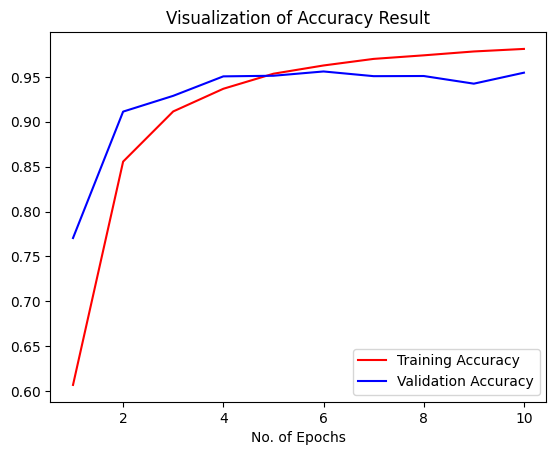

In [123]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [124]:
class_name = validation_set.class_names

In [126]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'dataset/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [127]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 324s 18ms/step


In [ ]:
import numpy as np

true_categories = []
for images, labels in test_set:
    true_categories.append(labels)

true_categories = np.concatenate(true_categories, axis=0)

In [130]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [131]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [132]:
from sklearn.metrics import classification_report


In [133]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.94      0.95       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.98       440
                                   Apple___healthy       0.95      0.89      0.92       502
                               Blueberry___healthy       0.93      0.99      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.97      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.91      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.